In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Powell Dogleg Trust Region Alogrithm

In [2]:
#Function that returns the value of function given a vector
def func(x):
    val = (x[1]-x[0])**4 + 8*x[0]*x[1] - x[0] + x[1] + 3
    return val

In [3]:
# Analytically defined function to calculate gradient of function at a given point
def gradient(x):
    grad = np.zeros(2)
    grad[0] = -4*(x[1]-x[0])**3 + 8*x[1] -1
    grad[1] = 4*(x[1]-x[0])**3 + 8*x[0] +1
    return grad.reshape((2,1))

In [6]:
#Function that returns hessian matrix
def hessian(x):    
    val = np.array([[0,0],
                    [0,0]])
    val[0][0] = 12*(x[1]-x[0])**2
    val[1][1] = 12*(x[1]-x[0])**2
    val[0][1] = 8-12*(x[1]-x[0])**2
    val[1][0] = val[0][1]
    return val

In [22]:
#Squared Norm of a two dimensional vector
def norm(x):
    val = x[0]**2 + x[1]**2
    val = val**0.5
    return val

In [66]:
def pc_eval(del_k, xk):
    if np.transpose(gradient(xk)).dot(hessian(xk)).dot(gradient(xk))>0:
        num = np.transpose(gradient(xk)).dot(gradient(xk))
        den = np.transpose(gradient(xk)).dot(hessian(xk)).dot(gradient(xk))
        pc = -1*(num/den)*gradient(xk)
    else:
        pc = -1*(del_k/norm(gradient(xk)))*gradient(xk)
    
    return pc

In [67]:
def pn_eval(xk):
    pn = -1*np.linalg.inv(hessian(xk)).dot(gradient(xk))
    return pn

In [72]:
def pk_eval(del_k, xk, eta):
    if norm(pn_eval(xk))<=del_k:
        pk = pn_eval(xk)
        return pk
    
    elif norm(pc_eval(del_k,xk))>= del_k:
        pk = (del_k/norm(pc_eval(del_k,xk)))*(pc_eval(del_k,xk))
        return pk
   
    else:
        pk = eta*pn_eval(xk) + (1-eta)*pc_eval(del_k,xk)
        return pk

In [89]:
def mk_func(xk, pk):
    mk = func(xk) + np.transpose(gradient(xk)).dot(pk) + 0.5*np.transpose(pk).dot(hessian(xk)).dot(pk)
    return mk

In [90]:
def rhok_eval(xk, pk):
    num = func(xk) - func(xk + pk)
    den = mk_func(xk, np.array([0,0]).reshape((2,1))) - mk_func(xk,pk)
    rho_k = num/den
    
    return rho_k

In [138]:
x0 = np.array([1.5,1.5]).reshape((2,1))
maxiter = 15000
tol = 10**-6
del_0 = 0.5
eta = 0.2
del_bar = 1

In [133]:
def powell_dogleg_trust_region(x0, maxiter, tol, del_0, eta, del_bar):
    i = 1
    x = x0
    delta = del_0
    X = {0:[x0, func(x0)]}
    while i<maxiter and norm(gradient(x))>tol:
            pk = pk_eval(delta, x, eta)
            rho_k = rhok_eval(x,pk)

            if rho_k<0.25:
                delta_nex = 0.25*norm(pk)

            else:
                if rho_k>0.75 and norm(pk) == delta:
                    delta_nex = min(2*delta, del_bar)
                else:
                    delta_nex = delta

            if rho_k>eta:
                x = x + pk
            delta = delta_nex
            
            X[i] = [x,func(x)]
            i = i+1
    print('Converged value of x is', np.transpose(x))
    print('Corresponding value of f(x) is ', func(x))
    print('Corresponding value of grad(x) is ', np.transpose(gradient(x)))
    print('Number of iterations taken is',i-1)
    if i==maxiter:
        print('Maximum iterations reached but convergence did not happen')
    return X                      

In [134]:
powell_dog = powell_dogleg_trust_region(x0, maxiter, tol, del_0, eta, del_bar)

Converged value of x is [[ 0.55357991 -0.55357991]]
Corresponding value of f(x) is  [0.94382711]
Corresponding value of grad(x) is  [[-5.04827996e-07  5.04827996e-07]]
Number of iterations taken is 9


# Plotting

In [135]:
x = np.array(list(powell_dog.keys()))
x1_val = []
x2_val = []
fx_val = []
for i in x:
    x1_val.append(powell_dog[i][0][0])
    x2_val.append(powell_dog[i][0][1])
    fx_val.append(powell_dog[i][1])

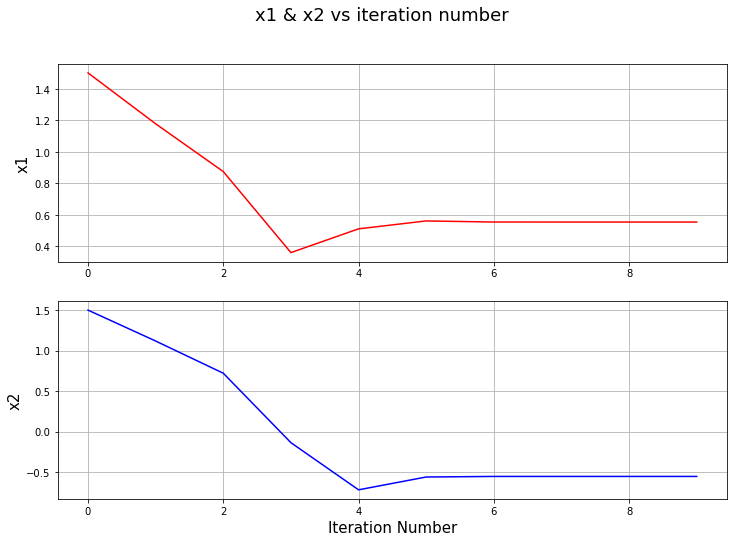

In [136]:
fig, axs = plt.subplots(2)
fig.set_size_inches(12,8)

fig.suptitle('x1 & x2 vs iteration number', fontsize = 18)
#subplot 1
axs[0].plot(x, x1_val,'r')
axs[0].grid()
axs[0].set_ylabel('x1', fontsize = 15)

#subplot 2
axs[1].plot(x, x2_val, 'b')
axs[1].grid()
axs[1].set_ylabel('x2', fontsize = 15)

plt.xlabel('Iteration Number', fontsize = 15)
plt.show()

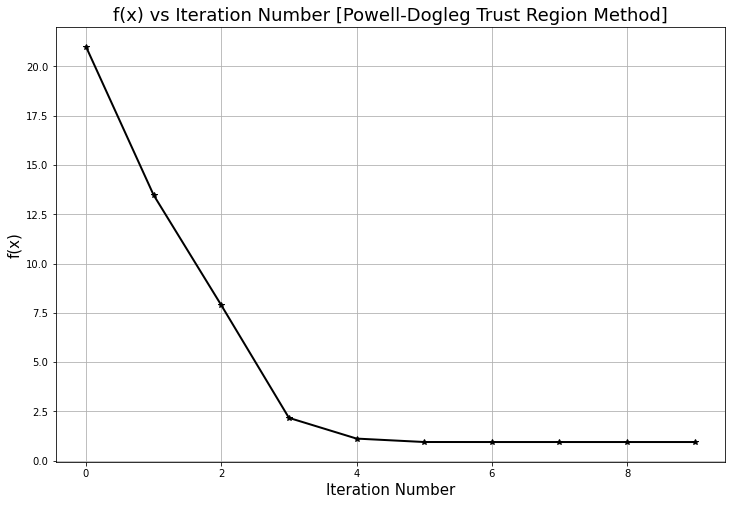

In [137]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 8)
plt.plot(x,fx_val, color = 'k', marker='*', linewidth = 2)
plt.grid()
plt.xlabel('Iteration Number', fontsize = 15)
plt.ylabel('f(x)', fontsize = 15)
plt.title('f(x) vs Iteration Number [Powell-Dogleg Trust Region Method]', fontsize = 18)
plt.show()